<a href="https://colab.research.google.com/github/itsyaagirl/Last-Mile-optimzation-using-Machine-Learning/blob/main/Last_Mile_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import  r2_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report


pd.set_option('display.max_columns', 100)

In [ ]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181')

In [ ]:
df[df['trip_uuid'] == 'trip-153741093647649320'][['trip_uuid','source_center','destination_center','actual_time','osrm_time','segment_actual_time','segment_osrm_time']]

,trip_uuid,source_center,destination_center,actual_time,osrm_time,segment_actual_time,segment_osrm_time
0,trip-153741093647649320,IND388121AAA,IND388620AAB,14.0,11.0,14.0,11.0
1,trip-153741093647649320,IND388121AAA,IND388620AAB,24.0,20.0,10.0,9.0
2,trip-153741093647649320,IND388121AAA,IND388620AAB,40.0,28.0,16.0,7.0
3,trip-153741093647649320,IND388121AAA,IND388620AAB,62.0,40.0,21.0,12.0
4,trip-153741093647649320,IND388121AAA,IND388620AAB,68.0,44.0,6.0,5.0
5,trip-153741093647649320,IND388620AAB,IND388320AAA,15.0,11.0,15.0,11.0
6,trip-153741093647649320,IND388620AAB,IND388320AAA,44.0,17.0,28.0,6.0
7,trip-153741093647649320,IND388620AAB,IND388320AAA,65.0,29.0,21.0,11.0
8,trip-153741093647649320,IND388620AAB,IND388320AAA,76.0,39.0,10.0,10.0
9,trip-153741093647649320,IND388620AAB,IND388320AAA,102.0,45.0,26.0,6.0


In [ ]:
# Removing Null Values

df.isnull().sum(axis = 0 )

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,293
destination_center,0
destination_name,261
od_start_time,0


In [ ]:
df = df.dropna(how='any')
df = df.reset_index(drop=True)

In [ ]:
df['od_start_time'] =  pd.to_datetime(df['od_start_time'])
df['od_end_time']  =  pd.to_datetime(df['od_end_time'])

# Now the dtype has been changed from object to datetime


In [ ]:
df['segment_key'] = df['trip_uuid'] + df['source_center'] + df['destination_center']
df['segment_actual_time' + '_sum'] = df.groupby('segment_key')['segment_actual_time'].aggregate('cumsum')
df['segment_osrm_distance' + '_sum'] = df.groupby('segment_key')['segment_osrm_distance'].aggregate('cumsum')
df['segment_osrm_time' + '_sum'] = df.groupby('segment_key')['segment_osrm_time'].aggregate('cumsum')

In [ ]:
df[df['trip_uuid']=='trip-153741093647649320'][['trip_uuid', 'source_center',
       'destination_center', 'actual_time',
       'osrm_time', 'segment_actual_time',
       'segment_osrm_time', 'segment_actual_time_sum'	,'segment_osrm_distance_sum',	'segment_osrm_time_sum']]

,trip_uuid,source_center,destination_center,actual_time,osrm_time,segment_actual_time,segment_osrm_time,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,trip-153741093647649320,IND388121AAA,IND388620AAB,14.0,11.0,14.0,11.0,14.0,11.9653,11.0
1,trip-153741093647649320,IND388121AAA,IND388620AAB,24.0,20.0,10.0,9.0,24.0,21.7243,20.0
2,trip-153741093647649320,IND388121AAA,IND388620AAB,40.0,28.0,16.0,7.0,40.0,32.5395,27.0
3,trip-153741093647649320,IND388121AAA,IND388620AAB,62.0,40.0,21.0,12.0,61.0,45.5619,39.0
4,trip-153741093647649320,IND388121AAA,IND388620AAB,68.0,44.0,6.0,5.0,67.0,49.4772,44.0
5,trip-153741093647649320,IND388620AAB,IND388320AAA,15.0,11.0,15.0,11.0,15.0,12.1171,11.0
6,trip-153741093647649320,IND388620AAB,IND388320AAA,44.0,17.0,28.0,6.0,43.0,21.2890,17.0
7,trip-153741093647649320,IND388620AAB,IND388320AAA,65.0,29.0,21.0,11.0,64.0,35.8252,28.0
8,trip-153741093647649320,IND388620AAB,IND388320AAA,76.0,39.0,10.0,10.0,74.0,47.1900,38.0
9,trip-153741093647649320,IND388620AAB,IND388320AAA,102.0,45.0,26.0,6.0,100.0,53.2334,44.0


In [ ]:
create_segment_dict = {

    'data' : 'first',
    'trip_creation_time': 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    'source_center' : 'first',
    'source_name' : 'first',

    'destination_center' : 'last',
    'destination_name' : 'last',

    'od_start_time' : 'first',
    'od_end_time' : 'first',
    'start_scan_to_end_scan' : 'first',


    'actual_distance_to_destination' : 'last',
    'actual_time' : 'last',

    'osrm_time' : 'last',
    'osrm_distance' : 'last',

    'segment_actual_time_sum' : 'last',
    'segment_osrm_distance_sum' : 'last',
    'segment_osrm_time_sum' : 'last',

    }

In [ ]:
segment = df.groupby('segment_key').agg(create_segment_dict).reset_index()
segment = segment.sort_values(by=['segment_key','od_end_time'], ascending=True).reset_index()

In [ ]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,segment_key,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,trip-153741093647649320IND388121AAAIND388620AAB,14.0,11.9653,11.0
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,trip-153741093647649320IND388121AAAIND388620AAB,24.0,21.7243,20.0
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,trip-153741093647649320IND388121AAAIND388620AAB,40.0,32.5395,27.0
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000,trip-153741093647649320IND388121AAAIND388620AAB,61.0,45.5619,39.0
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000,trip-153741093647649320IND388121AAAIND388620AAB,67.0,49.4772,44.0


In [ ]:
print("Columns in the dataframe:", df.columns)

Columns in the dataframe: Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor',
       'segment_key', 'segment_actual_time_sum', 'segment_osrm_distance_sum',
       'segment_osrm_time_sum'],
      dtype='object')


Machine Learning

In [ ]:
# Assuming df is the DataFrame with all relevant data loaded
# Define the target variable
target_variable = 'actual_time'

# Manually selected relevant features based on high correlation with 'actual_time'
selected_features = [
    'actual_distance_to_destination', 'segment_actual_time_sum',
    'segment_osrm_time_sum', 'segment_osrm_distance_sum',
    'osrm_time', 'osrm_distance'
]


In [ ]:
# Create the X and y datasets
X = df[selected_features]
y = df[target_variable]


In [ ]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Standardize the data for models that require it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Random Forest

In [ ]:
# 1. Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

In [ ]:
# Calculate metrics for Random Forest
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_accuracy = rf_model.score(X_test, y_test)

print("Random Forest:")
print(f"MSE: {rf_mse}")
print(f"MAE: {rf_mae}")
print(f"Accuracy: {rf_accuracy}")

Random Forest:
MSE: 3.4405367585920184
MAE: 0.9274314024390243
Accuracy: 0.9999904351167948


GBM

In [ ]:
# 2. Gradient Boosting Machine (GBM)
gbm_model = GradientBoostingRegressor(random_state=42)
gbm_model.fit(X_train, y_train)
gbm_predictions = gbm_model.predict(X_test)

In [ ]:
# Calculate metrics for GBM
gbm_mse = mean_squared_error(y_test, gbm_predictions)
gbm_mae = mean_absolute_error(y_test, gbm_predictions)
gbm_accuracy = gbm_model.score(X_test, y_test)

print("\nGradient Boosting Machine (GBM):")
print(f"MSE: {gbm_mse}")
print(f"MAE: {gbm_mae}")
print(f"Accuracy: {gbm_accuracy}")


Gradient Boosting Machine (GBM):
MSE: 21.97163405620285
MAE: 2.829173221043332
Accuracy: 0.9999389176374729


Naive Bayes

In [ ]:
# Binning the 'actual_time' into categories
bins = [0, 30, 60, np.inf]  # Example bins for fast (<30 mins), average (30-60 mins), slow (>60 mins)
labels = ['Fast', 'Average', 'Slow']
df['time_category'] = pd.cut(df['actual_time'], bins=bins, labels=labels)

In [ ]:
# Selected features for classification
selected_features = [
    'actual_distance_to_destination', 'segment_actual_time_sum',
    'segment_osrm_time_sum', 'segment_osrm_distance_sum',
    'osrm_time', 'osrm_distance'
]


In [ ]:
# Create the X and y datasets
X = df[selected_features]
y = df['time_category']


In [ ]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize the Gaussian Naive Bayes model
nb_model = GaussianNB()

In [ ]:
# Train the model
nb_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Make predictions
nb_predictions = nb_model.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, nb_predictions)
print(f"Naive Bayes Classification Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, nb_predictions))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, nb_predictions))


Naive Bayes Classification Accuracy: 87.25%

Classification Report:
               precision    recall  f1-score   support

     Average       0.62      0.86      0.72      5531
        Fast       0.80      0.91      0.85      3039
        Slow       1.00      0.87      0.93     20294

    accuracy                           0.87     28864
   macro avg       0.81      0.88      0.83     28864
weighted avg       0.90      0.87      0.88     28864


Confusion Matrix:
 [[ 4781   692    58]
 [  262  2772     5]
 [ 2662     0 17632]]


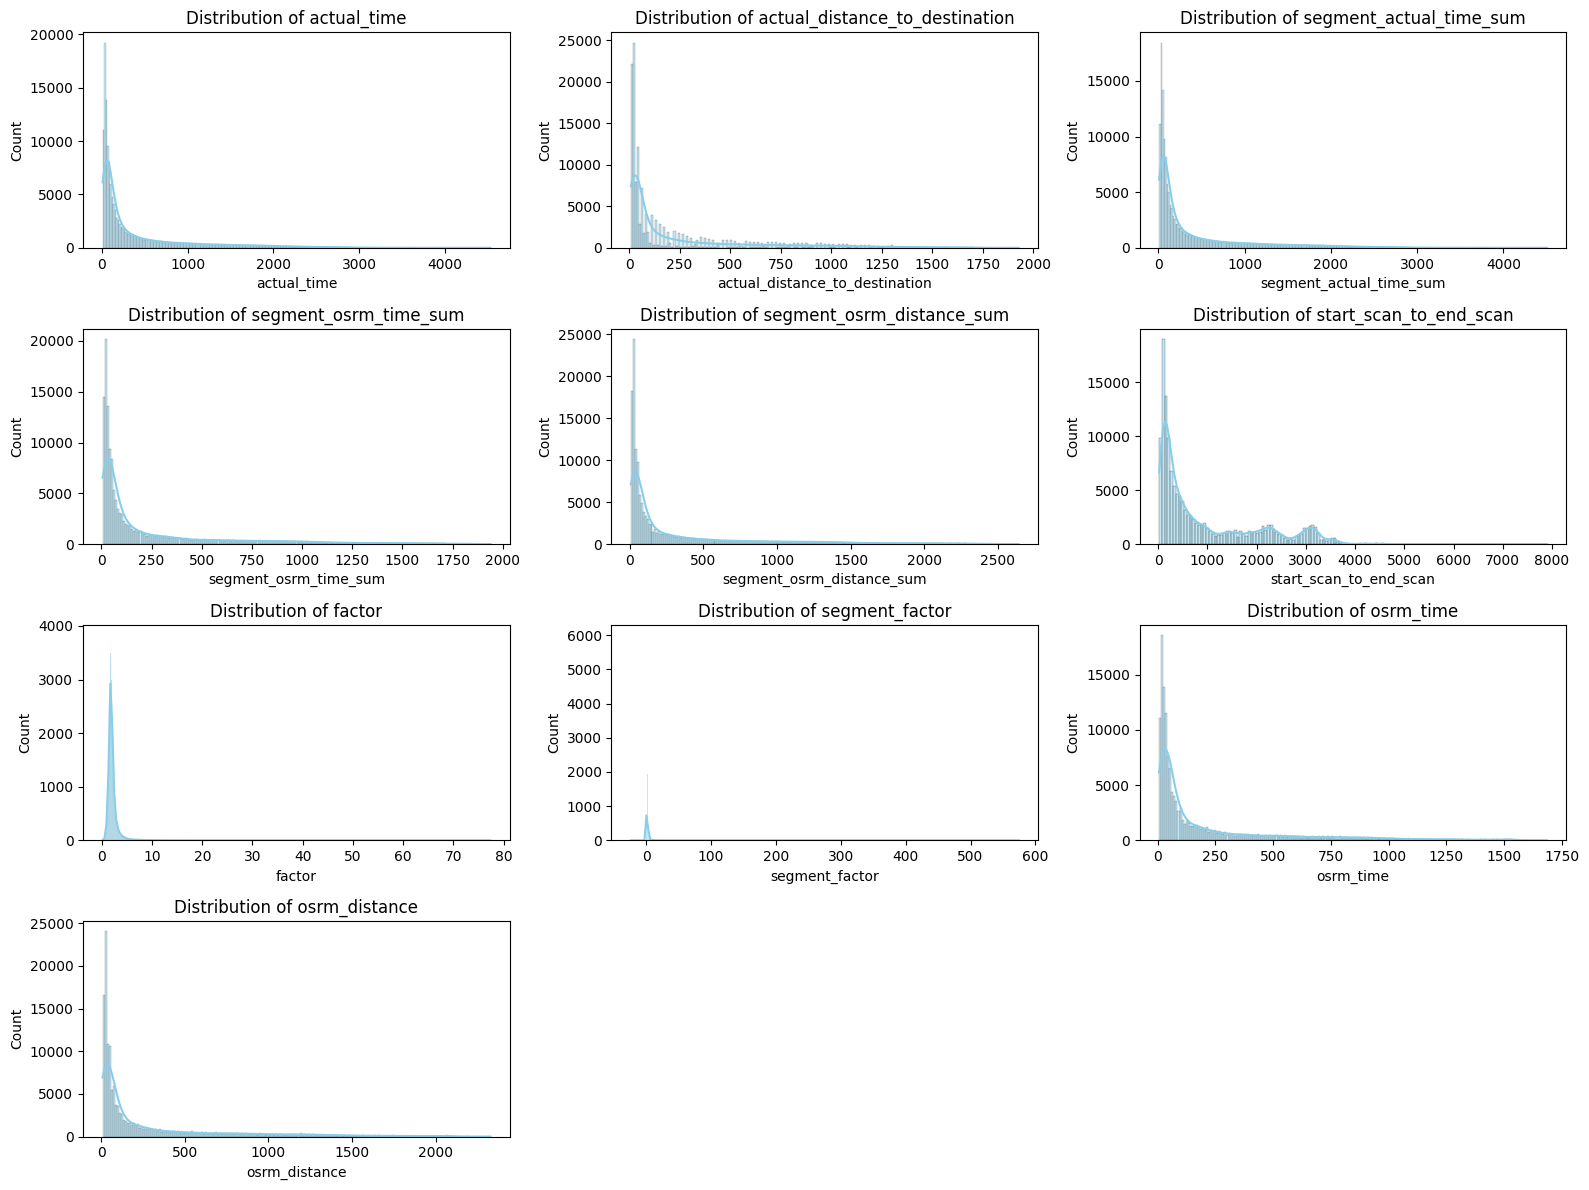

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of features to plot
features = [
    'actual_time', 'actual_distance_to_destination', 'segment_actual_time_sum',
    'segment_osrm_time_sum', 'segment_osrm_distance_sum',
    'start_scan_to_end_scan', 'factor', 'segment_factor',
    'osrm_time', 'osrm_distance'
]

# Plot distribution of each feature
plt.figure(figsize=(16, 12))
for i, feature in enumerate(features, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[feature], kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


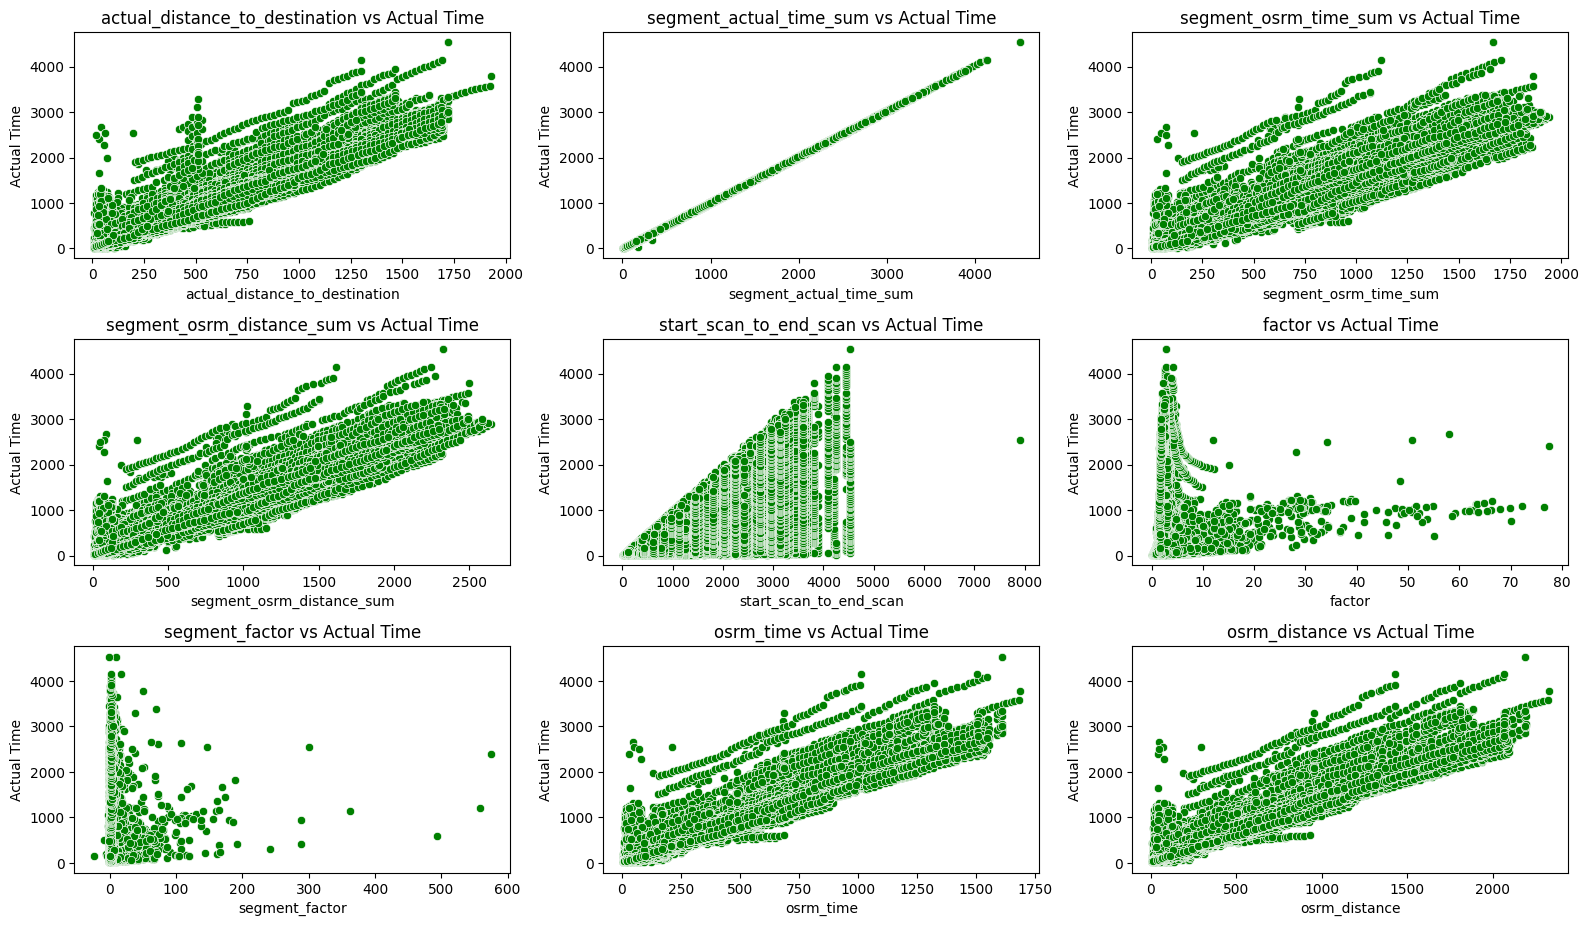

In [ ]:
#Feature vs. Target Scatter Plots
#Plot each feature against the target variable (actual_time) to understand their relationship.
plt.figure(figsize=(16, 12))
for i, feature in enumerate(features[1:], 1):  # Exclude 'actual_time' since it's the target
    plt.subplot(4, 3, i)
    sns.scatterplot(x=df[feature], y=df['actual_time'], color='green')
    plt.title(f'{feature} vs Actual Time')
    plt.xlabel(feature)
    plt.ylabel('Actual Time')
plt.tight_layout()
plt.show()


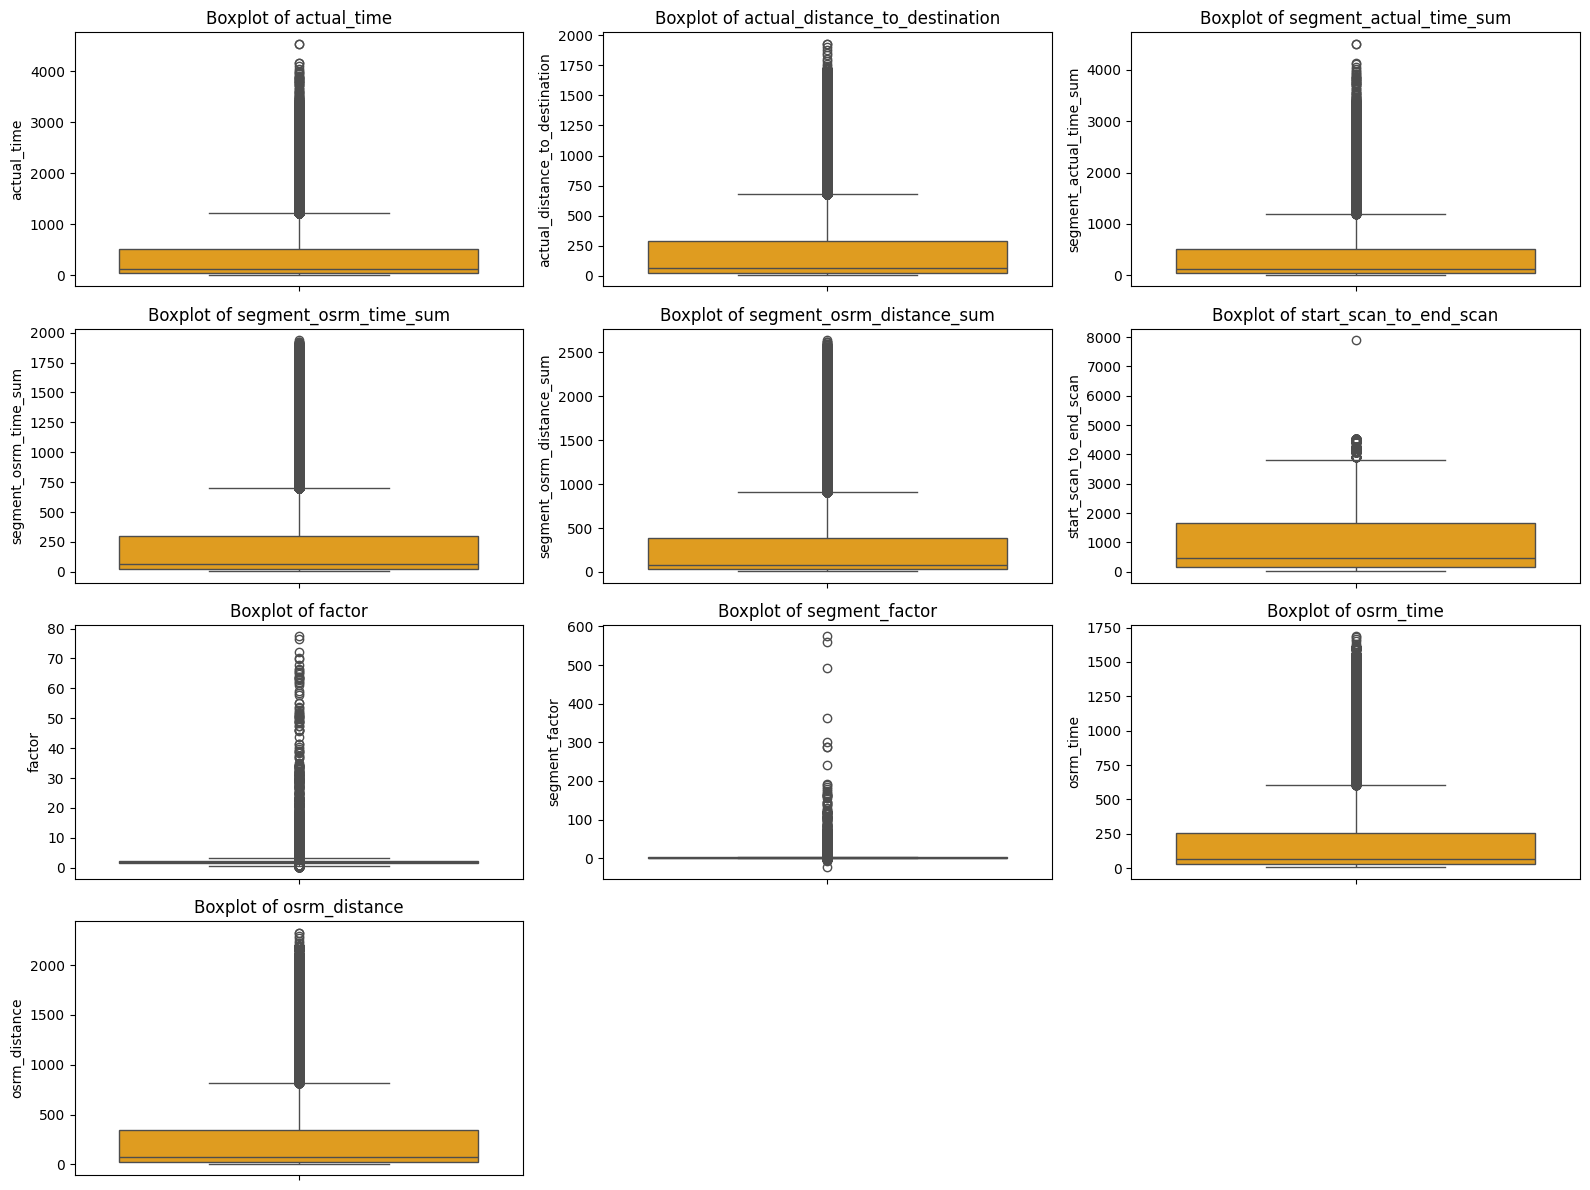

In [ ]:
plt.figure(figsize=(16, 12))
for i, feature in enumerate(features, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=df[feature], color='orange')
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()





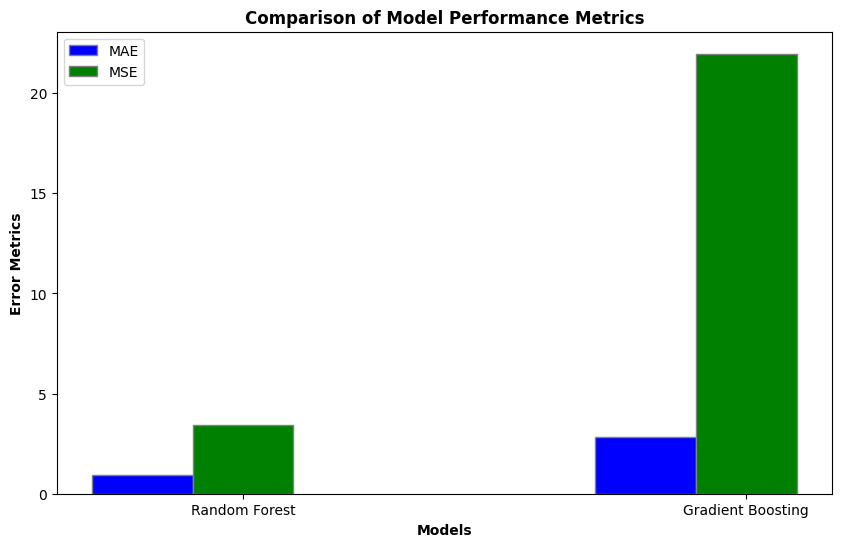

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Random Forest', 'Gradient Boosting']

# Performance metrics
mae_scores = [0.927, 2.829]  # Example MAE values for each model
mse_scores = [3.44, 21.97]  # Example MSE values for each model


# Setting up the positions and width for the bars
bar_width = 0.2
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]


# Plotting the bars
plt.figure(figsize=(10, 6))
plt.bar(r1, mae_scores, color='blue', width=bar_width, edgecolor='grey', label='MAE')
plt.bar(r2, mse_scores, color='green', width=bar_width, edgecolor='grey', label='MSE')


# Adding labels and title
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Error Metrics', fontweight='bold')
plt.title('Comparison of Model Performance Metrics', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(models))], models)

# Adding a legend
plt.legend()

# Display the plot
plt.show()